In [128]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns

import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv("data_science_asia_clean.csv", index_col = 0)
df.head(5)

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
1,470,55-59,Man,South Korea,No,('University Courses (resulting in a universit...,"('Kaggle (notebooks, competitions, etc)',)",Master’s degree,1-3 years,"('Python', 'SQL')","(' PyCharm ', ' Jupyter Notebook')","('None',)","(' Matplotlib ', ' Seaborn ')",1-2 years,"(' Scikit-learn ',)","('Linear or Logistic Regression', 'Decision Tr...","('No, I do not download pre-trained model weig...",NaN
2,174,25-29,Woman,China,Yes,"('Kaggle Learn Courses', 'University Courses (...","('University courses', 'Online courses (Course...",Master’s degree,< 1 years,"('Python', 'MATLAB')","(' Visual Studio ', ' MATLAB ', ' Jupyter Note...","('Colab Notebooks', 'Google Cloud Vertex AI Wo...",NaN,NaN,NaN,NaN,NaN,NaN
3,506,25-29,Man,Japan,No,"('Udemy',)","('Online courses (Coursera, EdX, etc)',)",Master’s degree,3-5 years,"('Python',)","(' Visual Studio Code (VSCode) ', ' Jupyter No...","(' Kaggle Notebooks', 'Colab Notebooks')","(' Seaborn ',)",2-3 years,"(' Scikit-learn ', ' PyTorch ', ' Xgboost ', ...","('Decision Trees or Random Forests', 'Dense Ne...","(' Huggingface Models ',)","('Kaggle (notebooks, forums, etc)',)"
4,283,22-24,Woman,China,Yes,('University Courses (resulting in a universit...,"('University courses', 'Social media platforms...",I prefer not to answer,< 1 years,"('Python', 'MATLAB', 'Other')","(' Visual Studio ', ' PyCharm ', ' MATLAB ')","('Google Cloud Vertex AI Workbench ',)","('None',)",Under 1 year,"(' TensorFlow ',)","('None',)","('Other storage services (i.e. google drive)',)","('Other',)"
5,492,40-44,Man,Japan,No,"('Kaggle Learn Courses',)","('Video platforms (YouTube, Twitch, etc)', 'Ka...",No formal education past high school,< 1 years,"('Python',)","(' Notepad++ ', ' Jupyter Notebook')","('None',)","('None',)",I do not use machine learning methods,NaN,NaN,NaN,"('Kaggle (notebooks, forums, etc)',)"


In [130]:
def convert_to_tuple(value):
    if pd.notna(value):
        return ast.literal_eval(value)
    else:
        return value
for col in df.columns:
    check_value = df[col].iloc[0]
    if (pd.isnull(check_value)):
        i = 1
        while(pd.isnull(check_value)):
            check_value = df[col].iloc[i]
            i += 1
    if isinstance(check_value, str):
        if(check_value[0] == '('):
            df[col] = df[col].apply(convert_to_tuple)

<h1><b>KHẢO SÁT VỀ DATA SCIENCE TẠI VIỆT NAM</b></h1>
<h3>Lọc dữ liệu những người khảo sát tại Việt Nam</h3>

In [131]:
vn_df = df.loc[df['In which country do you currently reside?'] == 'Viet Nam' ]
vn_df.head()

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
8,512,40-44,Man,Viet Nam,Yes,(Cloud-certification programs (direct from AWS...,"(University courses, Kaggle (notebooks, compet...",Doctoral degree,10-20 years,"(Python, SQL, C#, C++, Javascript, MATLAB)","(JupyterLab , Visual Studio , Visual Studio ...","( Kaggle Notebooks, Colab Notebooks, Azure Not...","( Matplotlib , Ggplot / ggplot2 , Geoplotlib...",5-10 years,"( Scikit-learn , TensorFlow , Keras , PyT...","(Linear or Logistic Regression, Decision Trees...","( TensorFlow Hub , PyTorch Hub , NVIDIA NGC...","(Kaggle (notebooks, forums, etc), Course Forum..."
9,380,18-21,Man,Viet Nam,Yes,"(None,)","(University courses, Online courses (Coursera,...",Some college/university study without earning ...,< 1 years,"(Python, SQL)","( Visual Studio Code (VSCode) , PyCharm , Ju...","(None,)","( Matplotlib , Seaborn )",I do not use machine learning methods,NaN,NaN,NaN,"(Kaggle (notebooks, forums, etc), YouTube (Kag..."
26,174,22-24,Woman,Viet Nam,Yes,"(LinkedIn Learning,)","(Online courses (Coursera, EdX, etc),)",Bachelor’s degree,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(Email newsletters (Data Elixir, O'Reilly Data..."
32,505,22-24,Man,Viet Nam,No,"(Coursera, Kaggle Learn Courses, Fast.ai, Udac...","(Online courses (Coursera, EdX, etc), Video pl...",Bachelor’s degree,1-3 years,"(Python,)","(JupyterLab , Visual Studio Code (VSCode) , ...","( Kaggle Notebooks, Amazon Sagemaker Studio L...","( Matplotlib , Ggplot / ggplot2 )",Under 1 year,"( Scikit-learn , TensorFlow , Keras , PyT...","(Decision Trees or Random Forests, Gradient Bo...","( TensorFlow Hub ,)","(Twitter (data science influencers), Reddit (r..."
35,1163,18-21,Man,Viet Nam,Yes,"(None,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>1. Khảo sát về nền tảng người khảo sát tại Việt Nam cảm thấy hữu ích nhất khi mới bắt đầu học Data Science</h3>

### 1.1. Tổng quát
##### Lọc ra cột có liên quan để thực hiện phân tích

In [132]:
vn_df_platform = vn_df['What products or platforms did you find to be most helpful when you first started studying data science?'].explode().value_counts().to_dict()
vn_df_platform

{'Kaggle (notebooks, competitions, etc)': 129,
 'Online courses (Coursera, EdX, etc)': 116,
 'Video platforms (YouTube, Twitch, etc)': 107,
 'University courses': 76,
 'Social media platforms (Reddit, Twitter, etc)': 48,
 'Other': 11,
 'None / I do not study data science': 8}

##### Xoá đi những giá trị không giúp ích cho phân tích, ở đây là 'None / I do not study data science'

In [133]:
del vn_df_platform['None / I do not study data science']
vn_df_platform

{'Kaggle (notebooks, competitions, etc)': 129,
 'Online courses (Coursera, EdX, etc)': 116,
 'Video platforms (YouTube, Twitch, etc)': 107,
 'University courses': 76,
 'Social media platforms (Reddit, Twitter, etc)': 48,
 'Other': 11}

##### Trực quan bằng biểu đồ cột

Text(0.0, 1.0, 'Products or platforms to be most helpful when Vietnamese first started studying data science')

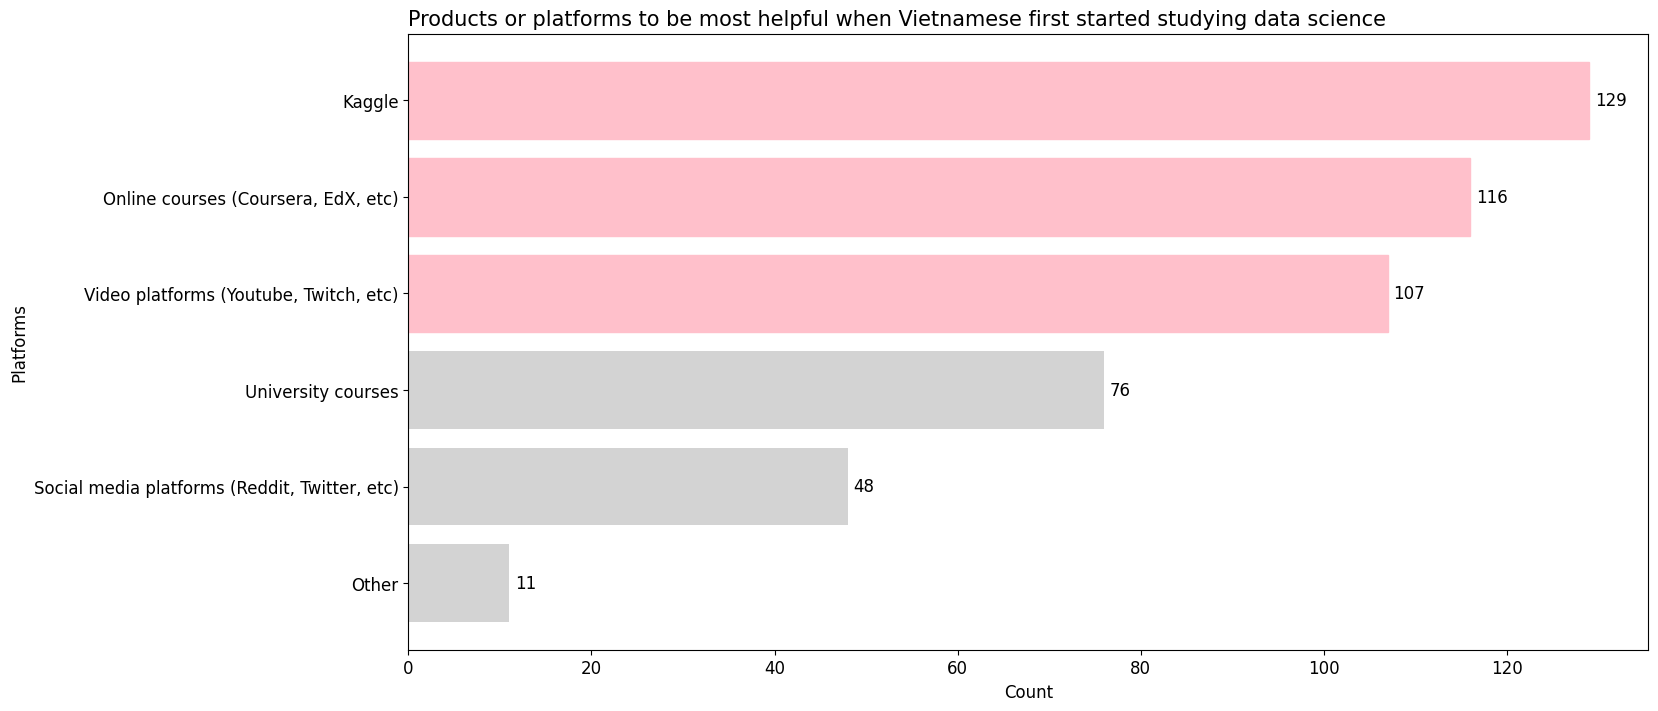

In [134]:
# x = platforms: Các nền tảng / ứng dụng được sử dụng khi mới bắt đầu học Data Science bởi người khảo sát tại Việt Nam
# y = platforms_value: Số lượng người sử dụng tương ứng

platforms = ['Kaggle', 'Online courses (Coursera, EdX, etc)', 
             'Video platforms (Youtube, Twitch, etc)',
             'University courses',
             'Social media platforms (Reddit, Twitter, etc)',
             'Other']

platforms_value = []
for i in vn_df_platform:
    platforms_value.append(vn_df_platform[i])

# Tạo biểu đồ cột ngang

plt.figure(figsize=(16, 8))
platform_plot = plt.barh(platforms, platforms_value, color="lightgrey")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên

ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(platform_plot, padding=4)

# Đặt top 3 nền tảng có số người chọn nhiều nhất màu hồng để làm nổi bật

for i in range (0,3):
    ax.get_children()[i].set_color("pink")

# Đặt tên cho trục x, trục y và tên biểu đồ

ax.set_ylabel("Platforms")
ax.set_xlabel("Count")
plt.title("Products or platforms to be most helpful when Vietnamese first started studying data science", loc="left", fontsize=15)

##### Phân tích

### 1.2. Khảo sát phân chia theo nhóm học sinh/sinh viên và nhóm không phải
##### Lọc ra cột có liên quan để thực hiện phân tích

In [135]:
vn_df_student = vn_df[['Are you currently a student?', 'What products or platforms did you find to be most helpful when you first started studying data science?']].dropna()

In [136]:
is_student = vn_df_student['Are you currently a student?'].unique()
is_student

array(['Yes', 'No'], dtype=object)

##### Đếm các nền tảng xuất hiện và nhóm theo người khảo sát là/không là học sinh tại thời điểm khảo sát

In [137]:
student_count = vn_df_student.explode('What products or platforms did you find to be most helpful when you first started studying data science?').value_counts().reset_index(name='Freq')
student_count.drop(student_count[student_count['What products or platforms did you find to be most helpful when you first started studying data science?'] == 'None / I do not study data science'].index, inplace = True)
student_count

,Are you currently a student?,What products or platforms did you find to be most helpful when you first started studying data science?,Freq
0,Yes,"Kaggle (notebooks, competitions, etc)",84
1,Yes,"Video platforms (YouTube, Twitch, etc)",73
2,Yes,"Online courses (Coursera, EdX, etc)",71
3,Yes,University courses,56
4,No,"Kaggle (notebooks, competitions, etc)",45
5,No,"Online courses (Coursera, EdX, etc)",45
6,No,"Video platforms (YouTube, Twitch, etc)",34
7,Yes,"Social media platforms (Reddit, Twitter, etc)",31
8,No,University courses,20
9,No,"Social media platforms (Reddit, Twitter, etc)",17


##### Trực quan bằng biểu đồ cột

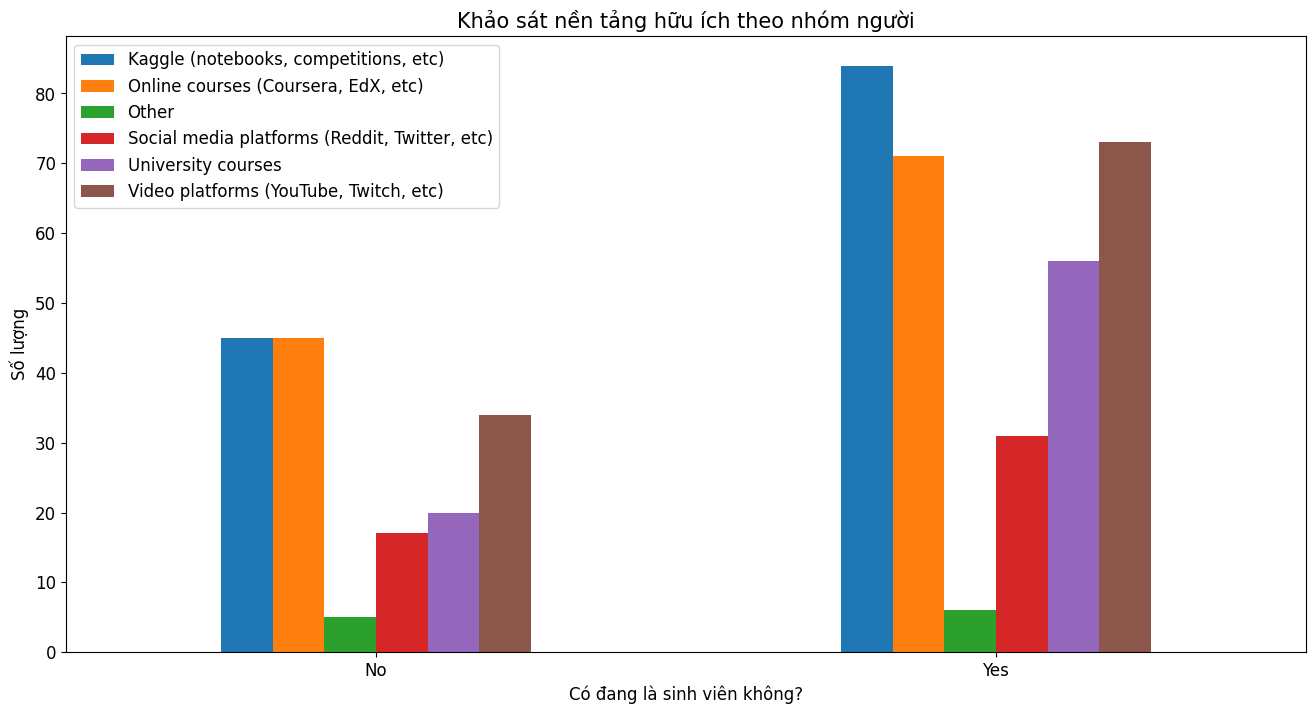

In [138]:
student_count.pivot_table('Freq', 'Are you currently a student?', 'What products or platforms did you find to be most helpful when you first started studying data science?').plot(kind='bar', figsize=(16,8))

# Đặt tên cho trục x, trục y và tên biểu đồ
ax = plt.subplot()
ax.set_ylabel("Số lượng")
ax.set_xlabel("Có đang là sinh viên không?")

plt.xticks(rotation=0)
plt.title("Khảo sát nền tảng hữu ích theo nhóm người", fontsize=15)
plt.rc('font', size=12)
plt.legend()

##### Phân tích